1) Kütüphaneler

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

2) Veri Toplamak

In [8]:
df = pd.read_csv("Training.csv")

3) Veri İncelemek ve Görselleştirmek

In [9]:
df.head()
df.shape
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


,count,mean,std,min,25%,50%,75%,max
itching,4920.0,0.137805,0.344730,0.0,0.0,0.0,0.0,1.0
skin_rash,4920.0,0.159756,0.366417,0.0,0.0,0.0,0.0,1.0
nodal_skin_eruptions,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
continuous_sneezing,4920.0,0.045122,0.207593,0.0,0.0,0.0,0.0,1.0
shivering,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
inflammatory_nails,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
blister,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
red_sore_around_nose,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
yellow_crust_ooze,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0


In [10]:
df.notnull()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
4916,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
4917,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
4918,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False


In [11]:
df.rename({"Unnamed: 133":"a"}, axis="columns", inplace=True)
df.drop(["a"],axis=1, inplace=True)
print(df.isnull().sum(), '\n')

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64 



In [24]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4915     True
4916     True
4917     True
4918     True
4919     True
Length: 4920, dtype: bool

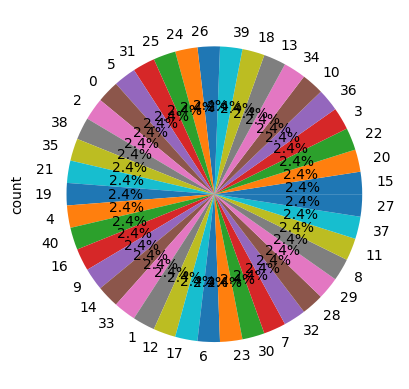

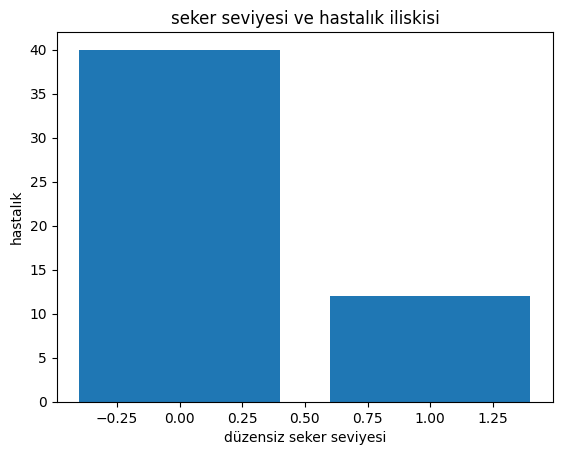

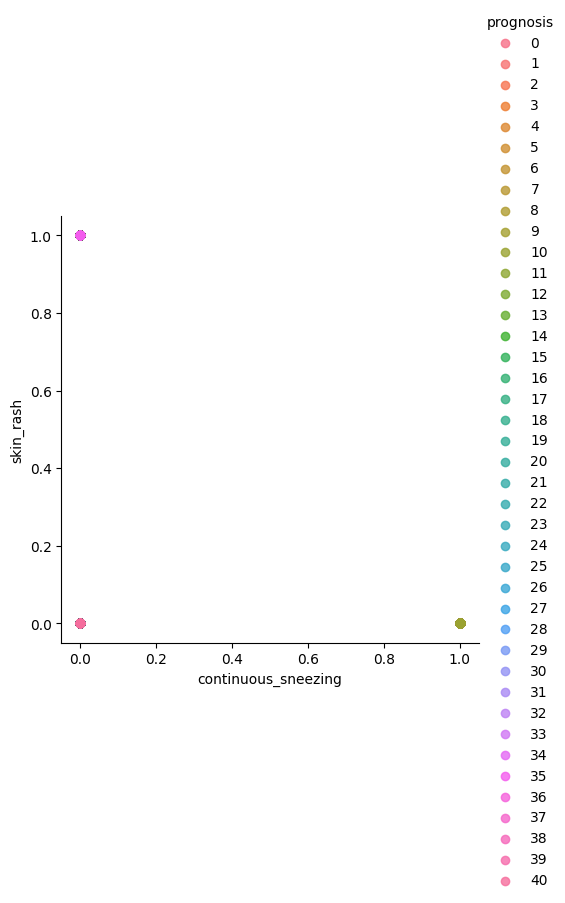

In [25]:
# hastalık türlerinin dağılımını görelim
df.prognosis.value_counts().plot(kind= "pie", autopct= "%.1f%%")
plt.show()

# bazı özellik sütunları ve hastalık türleri arasındaki ilişkiyi görelim
plt.bar(df['irregular_sugar_level'], df['prognosis'])
plt.xlabel('düzensiz seker seviyesi')
plt.ylabel('hastalık')
plt.title('seker seviyesi ve hastalık iliskisi')
plt.show()

# saçılım grafiği
sns.lmplot(x='continuous_sneezing', y='skin_rash', fit_reg=False, hue='prognosis', data=df)
plt.show()

4) Veriyi ML Modellerine Uygun Hale Getirmek

In [26]:

encoder = LabelEncoder()
df['prognosis'] =  encoder.fit_transform(df["prognosis"])

symptom = df.drop('prognosis',axis=1)
diagnosis = df['prognosis']

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(symptom, diagnosis, train_size=0.8)

5) Model Seçimi ve Modelin Eğitilmesi

In [27]:
linear_model = sklearn.linear_model.LinearRegression()
linear_model.fit(X_train,Y_train)

LinearRegression()

6) Modelin Optimize Edilmesi

In [28]:
Y_pred = linear_model.predict(X_test)
print(f'Train: {X_train.shape}, {Y_train.shape}','\n \n')
print("tahmin:", Y_pred,'\n \n')
print(f'Test: {X_test.shape}, {Y_test.shape}', '\n \n')

Train: (3936, 132), (3936,) 
 

tahmin: [25.66406679 31.26127404 24.3474164  37.56272108 31.94739205 32.5913011
  9.55193388 11.29840481  6.00702805 39.91836564  3.10866959 23.78247499
 35.90255763 27.33713104  4.70068806 10.87931913 27.41028829 27.33713104
 39.91836564 31.26127404 -0.73484804 35.90255763  0.74033466 26.64205029
  6.46525771 14.77116089 26.00268983 36.76661067 30.50055653 24.9802289
 29.30420059  3.10866959 12.87265184 35.73972346  9.08143221 36.19351583
  9.30997617 11.06580018 35.90255763 14.12478015  4.37040109  2.56734834
  4.70068806  7.86176076 30.31791694  0.74033466 14.05594873 26.15088319
 39.91836564 -0.10656496 34.40015911 16.02204494 26.15088319 14.70595834
 39.19839784  9.83285305 23.24938254 29.16075219 10.56621768 23.79006372
 17.79418751 17.04413321 40.18538876 14.77116089 14.77116089 37.56707635
 14.11953284 22.98655196  9.66177786 12.87265184 17.04413321 27.33713104
 17.04413321 12.70251893  6.46525771 11.99780702 24.16406679 37.69718175
 33.67247916 

In [29]:
r2 = sklearn.metrics.r2_score(Y_test, Y_pred)
mae = sklearn.metrics.mean_absolute_error(Y_test, Y_pred)
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(f"R2: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

R2: 0.9747535456119774
MAE: 1.1087673114003567
MSE: 3.4617542263491154


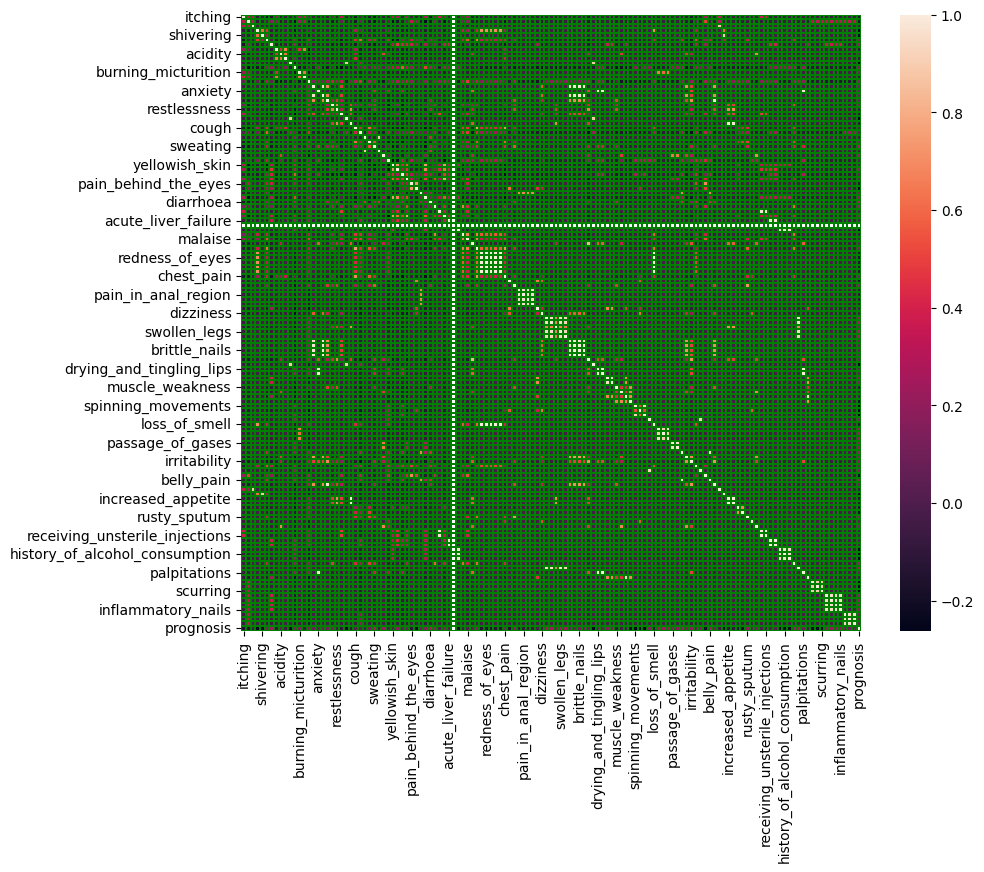

In [30]:
corr = df.corr()

fig, ax = plt.subplots(figsize= (10,8))

ax = sns.heatmap(corr, fmt='.2f', linewidths=0.01, linecolor='green')

Knn sınıflandırma

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(symptom, diagnosis, test_size=0.3, random_state=24)

knn_model.fit(X_train,Y_train)

knn_pred = knn_model.predict(X_test)

hata matrisi ve accuracy skor

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(Y_test,knn_pred),'\n \n')
print(accuracy_score(Y_test,knn_pred),'\n \n')

[[40  0  0 ...  0  0  0]
 [ 0 33  0 ...  0  0  0]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 31]] 
 

1.0 
 



K-Means kümeleme

In [33]:
from sklearn.cluster import KMeans
km_model= KMeans(n_clusters=42)
km_model.fit(df)
print(km_model.labels_)

c:\Users\pc\Desktop\ml-proje\project\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[40 40 40 ... 25 11 28]


Random forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier()
forest.fit(X_train,Y_train)

rf_pred_test=forest.predict(X_test)
rf_pred_train= forest.predict(X_train)
forest_acc = accuracy_score(Y_test,rf_pred_test)
print("\n Random Forest \n")
print("accuracy is:",forest_acc)


 Random Forest 

accuracy is: 1.0


In [35]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier()
data2= pd.read_csv("Training.csv")
data2.rename({"Unnamed: 133":"a"}, axis="columns", inplace=True)
data2.drop(["a"],axis=1, inplace=True)


b = data2['prognosis']
a= data2.drop('prognosis',axis=1)

X_train, X_test, Y_train, Y_test =sklearn.model_selection.train_test_split(a, b, test_size=0.3, random_state=24)

tree.fit(X_train,Y_train)
tree_pred = tree.predict(X_test)
tree_acc = accuracy_score(Y_test,tree_pred)
print("\n Decision Tree Classifier: \n" )
print("accuracy score:" ,tree_acc)

P= pd.read_csv('Testing.csv').drop(['prognosis'],axis=1)

res=pd.read_csv('Testing.csv').join(pd.DataFrame(tree.predict(P),columns=["tahmin"]))[["prognosis", "tahmin"]]

res



 Decision Tree Classifier: 

accuracy score: 0.9959349593495935


,prognosis,tahmin
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction
5,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,AIDS
7,Diabetes,Diabetes
8,Gastroenteritis,Gastroenteritis
9,Bronchial Asthma,Bronchial Asthma
